In [53]:
import pandas as pd
df = pd.read_csv('tags.csv')
print(df.tail())


                       tags   domain
195         Business Ethics  Company
196  Stakeholder Engagement  Company
197         Company History  Company
198    Operational Strategy  Company
199   Business Intelligence  Company


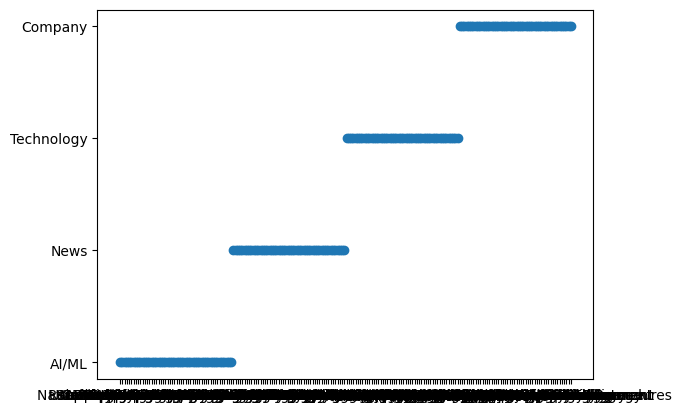

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder


X = df['tags']  
y = df['domain']  


le = LabelEncoder()
y_encoded = le.fit_transform(y)


X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)


vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)
X_train_tfidf
plt.scatter(X,y)

In [51]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score


model = SVC(kernel='sigmoid')  
model.fit(X_train_tfidf, y_train)


y_pred = model.predict(X_test_tfidf)


print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=le.classes_))


Accuracy: 0.75
Classification Report:
              precision    recall  f1-score   support

       AI/ML       0.38      0.83      0.53         6
     Company       0.90      0.90      0.90        10
        News       1.00      0.67      0.80        15
  Technology       0.86      0.67      0.75         9

    accuracy                           0.75        40
   macro avg       0.79      0.77      0.74        40
weighted avg       0.85      0.75      0.77        40



In [52]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay



In [5]:
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)

In [6]:
cm

array([[ 5,  0,  0,  1],
       [ 1,  9,  0,  0],
       [ 3,  1, 11,  0],
       [ 3,  0,  0,  6]], dtype=int64)

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt


Accuracy: 0.75
Classification Report:
              precision    recall  f1-score   support

       AI/ML       0.38      0.83      0.53         6
     Company       0.90      0.90      0.90        10
        News       1.00      0.67      0.80        15
  Technology       0.86      0.67      0.75         9

    accuracy                           0.75        40
   macro avg       0.79      0.77      0.74        40
weighted avg       0.85      0.75      0.77        40



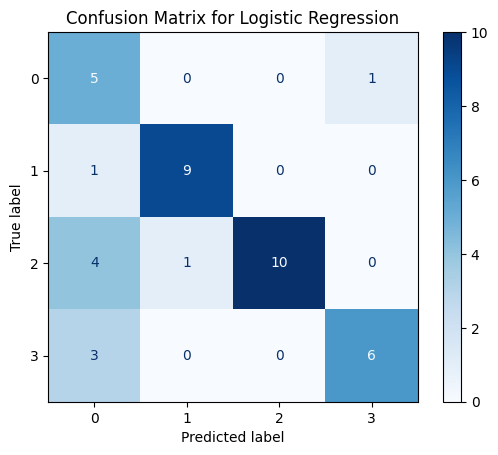

In [8]:

lr_model = LogisticRegression(max_iter=1000, random_state=42)  
lr_model.fit(X_train_tfidf, y_train)


y_pred_lr = lr_model.predict(X_test_tfidf)


print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Classification Report:")
print(classification_report(y_test, y_pred_lr, target_names=le.classes_))


cm_lr = confusion_matrix(y_test, y_pred_lr, labels=lr_model.classes_)


disp_lr = ConfusionMatrixDisplay(confusion_matrix=cm_lr, display_labels=lr_model.classes_)
disp_lr.plot(cmap=plt.cm.Blues, values_format='d')
plt.title('Confusion Matrix for Logistic Regression')
plt.show()


In [9]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import numpy as np


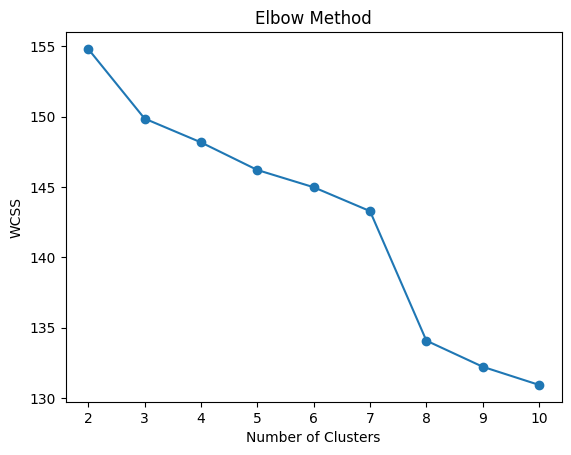

In [10]:
wcss = []
for i in range(2, 11):  # Start from 2 because K-Means needs at least 2 clusters
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_train_tfidf)
    wcss.append(kmeans.inertia_)

plt.plot(range(2, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()


In [41]:
################


####################author name ,publication year , category of rp , sitation , jounal or conference paper , domain 

338

In [12]:
import pandas as pd


data = pd.read_csv('tags.csv')


print(data.head())


print(data['domain'].unique())


                    tags domain
0       Machine Learning  AI/ML
1          Deep Learning  AI/ML
2        Neural Networks  AI/ML
3    Supervised Learning  AI/ML
4  Unsupervised Learning  AI/ML
['AI/ML' 'News' 'Technology' 'Company']


In [13]:
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer





vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(data['tags'])


label_encoder = LabelEncoder()
y = label_encoder.fit_transform(data['domain'])


In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report


model = LogisticRegression(multi_class='ovr', solver='liblinear')
model.fit(X_train, y_train)


y_pred = model.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')


Accuracy: 0.75


C:\Users\dhruv\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


In [56]:
new_tags = ['Technical Today']
new_X = vectorizer.transform(new_tags)
predicted_domain = model.predict(new_X)
predicted_domain = label_encoder.inverse_transform(predicted_domain)

print(f'Predicted Domain: {predicted_domain[0]}')


Predicted Domain: AI/ML


In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Use bi-grams and tri-grams in TF-IDF
vectorizer = TfidfVectorizer(ngram_range=(1, 3), max_features=5000)
X = vectorizer.fit_transform(data['tags'])


In [18]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


In [19]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)


In [20]:
y_pred

array([2, 0, 0, 1, 3, 0, 2, 1, 1, 3, 2, 1, 1, 0, 0, 1, 0, 1, 2, 2, 3, 0,
       3, 2, 0, 0, 2, 2, 0, 3, 0, 0, 0, 0, 1, 0, 3, 3, 1, 2])

In [21]:
accuracy=accuracy_score(y_test,y_pred)
accuracy

0.725

In [22]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder


data = pd.read_csv('tags.csv')


data.dropna(inplace=True)


label_encoder = LabelEncoder()
y = label_encoder.fit_transform(data['domain'])

# Vectorize the tags using TF-IDF with n-grams (unigrams, bigrams, trigrams)
vectorizer = TfidfVectorizer(ngram_range=(1, 3), max_features=5000)
X = vectorizer.fit_transform(data['tags'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))


print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
               

Accuracy: 0.70
              precision    recall  f1-score   support

       AI/ML       0.31      0.83      0.45         6
     Company       1.00      0.80      0.89        10
        News       1.00      0.60      0.75        15
  Technology       0.86      0.67      0.75         9

    accuracy                           0.70        40
   macro avg       0.79      0.72      0.71        40
weighted avg       0.86      0.70      0.74        40

Confusion Matrix:
[[5 0 0 1]
 [2 8 0 0]
 [6 0 9 0]
 [3 0 0 6]]
